<a href="https://colab.research.google.com/github/nalaurandrade/RedeBayersiana/blob/main/Rede_Bayersiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Questão 1 - A rede bayesiana estudada é uma técnica supervisionada ou não supervisionada? Justifique com um exemplo para ilustrar sua resposta.**

Pode ser usada dos dois modos. O que define isso é a finalidade do uso. Por que ele aprende a prever as coisas de acordo com os parâmetros passados.

**Questão 2 - Explique o fluxo abaixo**


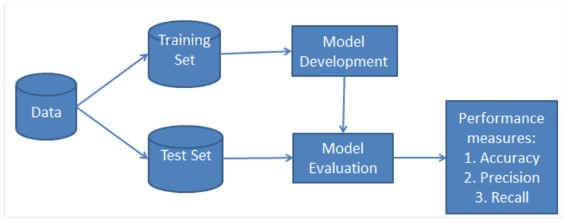

O fluxograma mostra o processo de construção e avaliação de um modelo de aprendizado de máquina.
Primeiro, a base de dados é dividida em ‘training set’ e ‘test set’. O training set treina o modelo, ralizando cálculos de relação e probailidade. O test set é usado pra provar que o modelo foi bem generalizado, na Model Evalutinon. Depois usa a acurácia pra ver o desempenho.

# Exercício 1

In [ ]:
# ---------------------------------------------
# EXERCÍCIO 1 – Código do artigo DataCamp
# Naive Bayes (GaussianNB) usando o Iris Dataset
# ---------------------------------------------

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# ---------------------------------------------
# 1) Carregar o dataset Iris (como no artigo)
# ---------------------------------------------
iris = datasets.load_iris()

X = iris.data
y = iris.target

# ---------------------------------------------
# 2) Dividir em treino e teste
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

# ---------------------------------------------
# 3) Criar e treinar o modelo
# ---------------------------------------------
model = GaussianNB()
model.fit(X_train, y_train)

# ---------------------------------------------
# 4) Fazer previsões
# ---------------------------------------------
y_pred = model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

# ---------------------------------------------
# 5) Fazer 5 testes novos (pedido da atividade)
# ---------------------------------------------
novos_testes = pd.DataFrame([
    [5.1, 3.5, 1.4, 0.2],
    [6.7, 3.1, 4.7, 1.5],
    [7.2, 3.6, 6.1, 2.5],
    [4.9, 2.4, 3.3, 1.0],
    [6.3, 2.7, 4.9, 1.8]
], columns=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"])

print("\n===== 5 NOVAS AMOSTRAS =====")
print(novos_testes)

pred_novos = model.predict(novos_testes)

print("\nPrevisões para os novos casos:")
for i, pred in enumerate(pred_novos):
    especie = iris.target_names[pred]
    print(f"Exemplo {i+1}: classe prevista = {especie}")


Acurácia: 0.9333333333333333

Relatório de Classificação:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.89      0.91        18
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45


===== 5 NOVAS AMOSTRAS =====
   SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          6.7         3.1          4.7         1.5
2          7.2         3.6          6.1         2.5
3          4.9         2.4          3.3         1.0
4          6.3         2.7          4.9         1.8

Previsões para os novos casos:
Exemplo 1: classe prevista = setosa
Exemplo 2: classe prevista = versicolor
Exemplo 3: classe prevista = virginica
Exemplo 4: classe prevista = versicolor
Exemplo 5: classe prevista = vi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


# Exercício 2

In [ ]:
# 1) Importações e montagem dos dados
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder

# Dados fornecidos na tabela
data = {
    'Nome': ['João', 'Pedro', 'Maria', 'José', 'Ana', 'Leila'],
    'Febre': ['sim', 'não', 'sim', 'sim', 'sim', 'não'],
    'Enjoo': ['sim', 'não', 'sim', 'não', 'não', 'não'],
    'Manchas': ['pequenas', 'grandes', 'pequenas', 'grandes', 'pequenas', 'grandes'],
    'Dores': ['sim', 'não', 'não', 'sim', 'sim', 'sim'],
    'Diagnóstico': ['doente', 'saudável', 'saudável', 'doente', 'saudável', 'doente']
}

df = pd.DataFrame(data)
df


,Nome,Febre,Enjoo,Manchas,Dores,Diagnóstico
0,João,sim,sim,pequenas,sim,doente
1,Pedro,não,não,grandes,não,saudável
2,Maria,sim,sim,pequenas,não,saudável
3,José,sim,não,grandes,sim,doente
4,Ana,sim,não,pequenas,sim,saudável
5,Leila,não,não,grandes,sim,doente


### Por que codificar as variáveis?

Modelos como `CategoricalNB` esperam entradas categóricas já numerizadas — aqui usamos `OrdinalEncoder` para transformar cada categoria em um inteiro. É importante usar o mesmo encoder para os dados de treino e para os novos casos a prever.


In [ ]:
# 2) Pré-processamento e treinamento
X = df[['Febre', 'Enjoo', 'Manchas', 'Dores']].copy()
y = df['Diagnóstico'].map({'saudável': 0, 'doente': 1}).astype(int)

# OrdinalEncoder transforma categorias em inteiros (mesma ordem aprendida será usada em predições)
enc = OrdinalEncoder()
X_enc = enc.fit_transform(X)

# Treinar o modelo CategoricalNB
model = CategoricalNB()
model.fit(X_enc, y)

# Mostrar mapeamento aprendido pelo encoder
enc_map = {}
for i, col in enumerate(['Febre', 'Enjoo', 'Manchas', 'Dores']):
    enc_map[col] = {cat: int(code) for cat, code in zip(enc.categories_[i], range(len(enc.categories_[i])))}

print('Mapeamento de categorias (OrdinalEncoder):')
enc_map


Mapeamento de categorias (OrdinalEncoder):


{'Febre': {'não': 0, 'sim': 1},
 'Enjoo': {'não': 0, 'sim': 1},
 'Manchas': {'grandes': 0, 'pequenas': 1},
 'Dores': {'não': 0, 'sim': 1}}

In [ ]:
# 3) Casos novos a classificar
novos = pd.DataFrame({
    'Nome': ['Luis', 'Laura'],
    'Febre': ['não', 'sim'],
    'Enjoo': ['não', 'sim'],
    'Manchas': ['pequenas', 'grandes'],
    'Dores': ['sim', 'sim']
})

# Codificar com o mesmo encoder
X_novos_enc = enc.transform(novos[['Febre', 'Enjoo', 'Manchas', 'Dores']])

# Previsões e probabilidades
preds = model.predict(X_novos_enc)
probs = model.predict_proba(X_novos_enc)

# Mapear de volta para rótulos textuais
pred_labels = ['doente' if p==1 else 'saudável' for p in preds]

result = novos.copy()
result['Predição'] = pred_labels
result['Prob(saudável)'] = probs[:,0]
result['Prob(doente)'] = probs[:,1]

result


,Nome,Febre,Enjoo,Manchas,Dores,Predição,Prob(saudável),Prob(doente)
0,Luis,não,não,pequenas,sim,doente,0.428571,0.571429
1,Laura,sim,sim,grandes,sim,doente,0.250000,0.750000


## Interpretação das probabilidades

- A coluna `Prob(doente)` mostra a confiança do modelo em cada previsão.
- Valores próximos de 0.5 indicam incerteza; valores mais próximos de 0 ou 1 indicam maior confiança.

No nosso resultado (com os dados fornecidos):
- Luis tem prob(doente) ≈ 0.571 — previsão `doente` com confiança moderada.
- Laura tem prob(doente) ≈ 0.750 — previsão `doente` com confiança maior.

Lembre-se: com apenas 6 exemplos de treino, o modelo é limitado. Para maior confiabilidade, recomenda-se mais dados.


In [ ]:
# 4) Observações finais
print('Tamanho do conjunto de treino:', df.shape)
print('\nDistribuição das classes:')
print(df['Diagnóstico'].value_counts())

Tamanho do conjunto de treino: (6, 6)

Distribuição das classes:
Diagnóstico
doente      3
saudável    3
Name: count, dtype: int64
